In [22]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras
import random
(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()

In [23]:
subset = 10000 #nombre d'image total
nb_classes = 10 # nombre de target total (0 ..... 9 )

In [24]:
img_rows, img_cols = 28,28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:subset].reshape(X_train[:subset].shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

In [25]:
print("x_train shape :", X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape : (10000, 28, 28, 1)
10000 train samples
10000 test samples


In [32]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), #couche convolution 3x3
                activation = 'relu',
                input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2))) #Pooling 2x2 qui récupère la valeur max

model.add(Conv2D(16, kernel_size=(3,3), #couche convolution 3x3
                activation = 'relu',
                input_shape = input_shape))
model.add(Conv2D(16, kernel_size=(3,3), #couche convolution 3x3
                activation = 'relu',
                input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2))) #Pooling 2x2 qui récupère la valeur max
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation = 'softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 16)          2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 16)         

C:\Users\pc\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:
batch = 512
epochs = 40
history = model.fit(X_train, y_train, 
          batch_size = batch, 
          epochs = epochs, 
          verbose=1, 
          validation_data=(X_test, y_test))

Epoch 1/40
20/20 [==============================] - 2s 101ms/step - loss: 1.9926 - accuracy: 0.2888 - val_loss: 0.7516 - val_accuracy: 0.7697
Epoch 2/40
20/20 [==============================] - 2s 95ms/step - loss: 0.8441 - accuracy: 0.7278 - val_loss: 0.2676 - val_accuracy: 0.9241
Epoch 3/40
20/20 [==============================] - 2s 87ms/step - loss: 0.4096 - accuracy: 0.8766 - val_loss: 0.1758 - val_accuracy: 0.9489
Epoch 4/40
20/20 [==============================] - 2s 86ms/step - loss: 0.3147 - accuracy: 0.9027 - val_loss: 0.1374 - val_accuracy: 0.9599
Epoch 5/40
20/20 [==============================] - 2s 91ms/step - loss: 0.2626 - accuracy: 0.9210 - val_loss: 0.1116 - val_accuracy: 0.9669
Epoch 6/40
20/20 [==============================] - 2s 96ms/step - loss: 0.2232 - accuracy: 0.9333 - val_loss: 0.1022 - val_accuracy: 0.9674
Epoch 7/40
20/20 [==============================] - 2s 96ms/step - loss: 0.2061 - accuracy: 0.9376 - val_loss: 0.0928 - val_accuracy: 0.9733
Epoch 8/40
2

The accuracy on the best set is 98.54000210762024 %


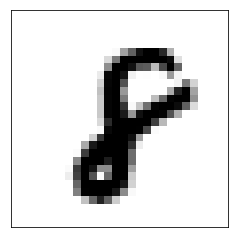

1/1 [==============================] - 0s 56ms/step
Le chiffre reconnu est : 8
Le chiffre à reconnaitre est : 8


In [34]:
def plot_mnist_digit(image):
    """plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1 ,1 ,1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss, acc = model.evaluate(X_test, y_test, verbose =0)
index = random.randint(1,subset)
print("The accuracy on the best set is", (acc*100),"%")
plot_mnist_digit(X_test_base[index])
cl = np.argmax(model.predict(X_test[index].reshape((1,28,28,1))), axis=1)

print("Le chiffre reconnu est :", cl[0])
print("Le chiffre à reconnaitre est :", np.argmax(y_test[index]))
#Meilleur score obtenu est de 98.54%

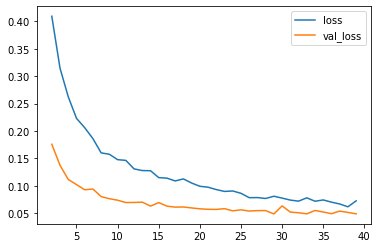

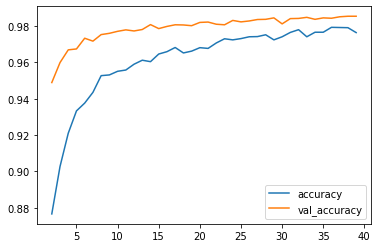

In [35]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[2:, ['loss', 'val_loss']].plot()
history_frame.loc[2:, ['accuracy', 'val_accuracy']].plot();